In [14]:
# ! pip install SpeechRecognition pydub

In [15]:
# ! pip install librosa

In [16]:
import librosa
import librosa.display
import pandas as pd 
import numpy as np
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
rav = 'D:/project/data/'
tess = 'D:/project/TESS Toronto emotional speech set data/'

# RAVDESS DataSet

In [18]:
dir_rav = os.listdir(rav)
dir_rav.sort()
dir_rav

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [19]:
emotion=[]
gender=[]
path=[]
for i in dir_rav:
    fname = os.listdir(rav+i)
    print(fname)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)
        path.append(rav+i+'/'+f)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-01-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-04-01-02-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-05-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-05-02-01-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-05-02-02-01-01.wav', '03-01-05-02-02-02-

In [20]:
print(emotion)

[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 

In [21]:
print(gender)

['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female',

In [22]:
rav_df = pd.DataFrame(emotion)
rav_df = rav_df.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust',8:'surprise'})
rav_df = pd.concat([pd.DataFrame(gender),rav_df],axis=1)
rav_df.columns=['gender','emotion']
rav_df["labels"]=rav_df.gender + "_" + rav_df.emotion
rav_df = pd.concat([rav_df, pd.DataFrame(path, columns=['path'])],axis=1)
rav_df

,gender,emotion,labels,path
0,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-01-01.wav
1,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-02-01.wav
2,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-01-01.wav
3,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-02-01.wav
4,male,calm,male_calm,D:/project/data/Actor_01/03-01-02-01-01-01-01.wav
...,...,...,...,...
1435,female,surprise,female_surprise,D:/project/data/Actor_24/03-01-08-01-02-02-24.wav
1436,female,surprise,female_surprise,D:/project/data/Actor_24/03-01-08-02-01-01-24.wav
1437,female,surprise,female_surprise,D:/project/data/Actor_24/03-01-08-02-01-02-24.wav
1438,female,surprise,female_surprise,D:/project/data/Actor_24/03-01-08-02-02-01-24.wav


In [23]:
len(rav_df)

1440

In [24]:
rav_df["gender"].value_counts()

male      720
female    720
Name: gender, dtype: int64

In [25]:
rav_df["emotion"].value_counts()

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: emotion, dtype: int64

In [26]:
rav_df["labels"].value_counts()

male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_fear          96
male_disgust       96
male_surprise      96
female_calm        96
female_happy       96
female_sad         96
female_angry       96
female_fear        96
female_disgust     96
female_surprise    96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64

## Playing the audio file

In [27]:
fname = rav + 'Actor_14/03-01-06-02-02-02-14.wav'
ipd.Audio(fname)

## waveplot 

In [28]:
def create_waveplot(f,t):
    data,sr = librosa.load(f)
    plt.figure(figsize=(15,5))
    librosa.display.waveshow(data, sr=sr);
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title(t)
    plt.show()

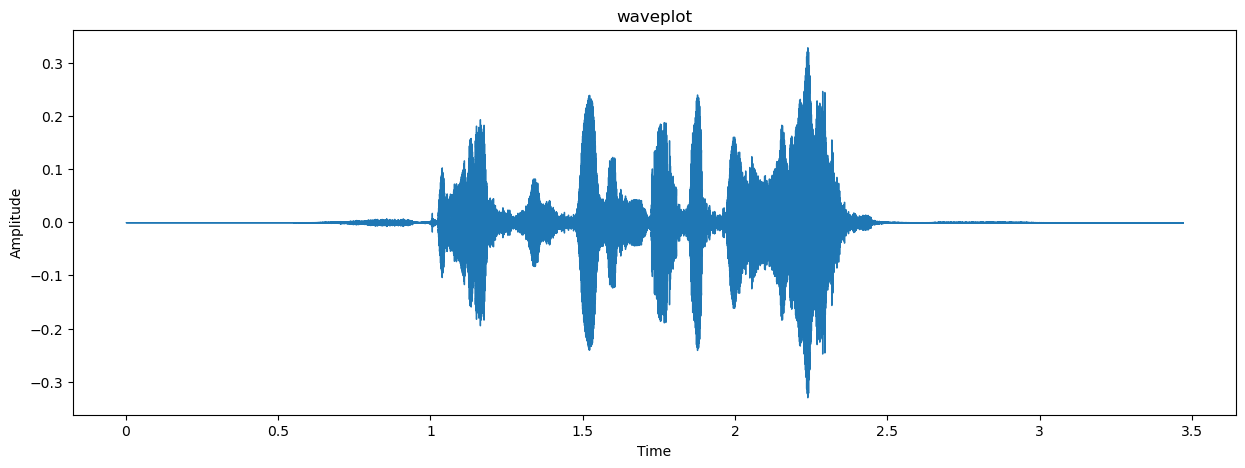

In [29]:
create_waveplot(fname,"waveplot")

# TESS DataSet

In [30]:
dir_tess = os.listdir(tess)
dir_tess.sort()
dir_tess

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'TESS Toronto emotional speech set data',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [31]:
path=[]
emotion=[]
e=[]
for i in dir_tess:
    fname=os.listdir(tess+i)
    for f in fname:
        if i=='OAF_angry' or i=='YAF_angry':
            emotion.append('female_angry')
            e.append("angry")
        elif i=='OAF_disgust' or i=='YAF_disgust':
            emotion.append('female_disgust')
            e.append('disgust')
        elif i=='OAF_Fear' or i=='YAF_fear':
            emotion.append('female_fear')
            e.append("fear")
        elif i=='OAF_happy' or i=='YAF_happy':
            emotion.append('female_happy')
            e.append("happy")
        elif i=='OAF_neutral' or i=='YAF_neutral':
            emotion.append('female_neutral')
            e.append("neutral")
        elif i=='OAF_Pleasant_surprise' or i=='YAF_pleasant_surprised':
            emotion.append('female_surprise')
            e.append('surprise')
        elif i=='OAF_Sad' or i=='YAF_sad':
            emotion.append('female_sad')
            e.append("sad")
        else:
            emotion.append('unknown')
            e.append("unknown")
        path.append(tess + i + '/' + f)
        

In [32]:
tess_df = pd.DataFrame(list(zip(e,emotion)), columns=['emotion','labels'])
tess_df["gender"]="female"
tess_df = pd.concat([tess_df, pd.DataFrame(path, columns=['path'])],axis=1)
tess_df

,emotion,labels,gender,path
0,fear,female_fear,female,D:/project/TESS Toronto emotional speech set d...
1,fear,female_fear,female,D:/project/TESS Toronto emotional speech set d...
2,fear,female_fear,female,D:/project/TESS Toronto emotional speech set d...
3,fear,female_fear,female,D:/project/TESS Toronto emotional speech set d...
4,fear,female_fear,female,D:/project/TESS Toronto emotional speech set d...
...,...,...,...,...
2809,sad,female_sad,female,D:/project/TESS Toronto emotional speech set d...
2810,sad,female_sad,female,D:/project/TESS Toronto emotional speech set d...
2811,sad,female_sad,female,D:/project/TESS Toronto emotional speech set d...
2812,sad,female_sad,female,D:/project/TESS Toronto emotional speech set d...


In [33]:
tess_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
unknown             14
Name: labels, dtype: int64

## Playing the audio file

In [34]:
fname = tess + 'YAF_fear/YAF_dog_fear.wav'
ipd.Audio(fname)

## Waveplot

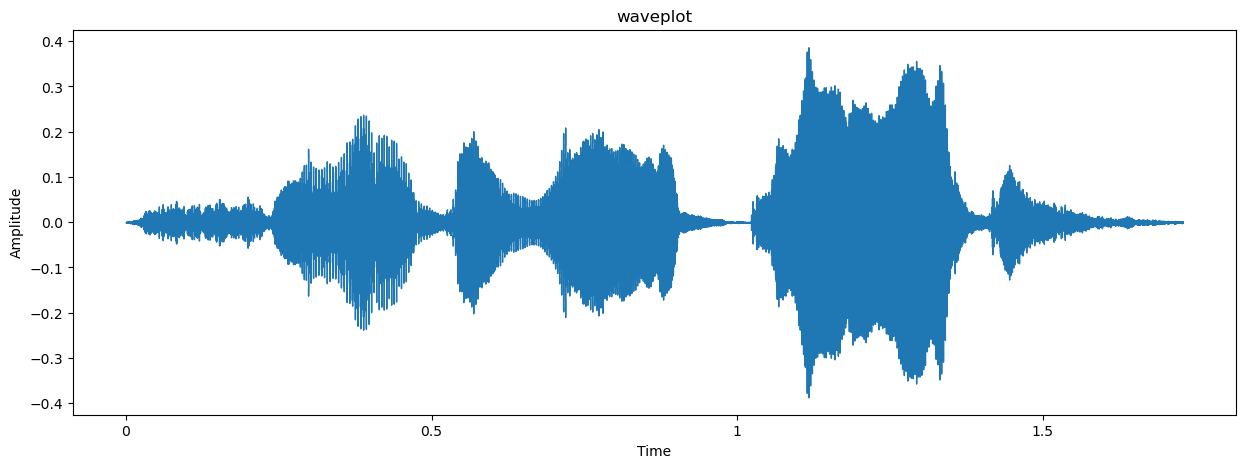

In [35]:
create_waveplot(fname,"waveplot")

## Ravdess & Tess Dataset

In [36]:
df = pd.concat([rav_df, tess_df], axis=0)
df.index=np.arange(len(df))
df

,gender,emotion,labels,path
0,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-01-01.wav
1,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-02-01.wav
2,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-01-01.wav
3,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-02-01.wav
4,male,calm,male_calm,D:/project/data/Actor_01/03-01-02-01-01-01-01.wav
...,...,...,...,...
4249,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4250,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4251,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4252,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...


In [37]:
df["emotion"].value_counts()

happy       592
sad         592
angry       592
fear        592
disgust     592
surprise    592
neutral     496
calm        192
unknown      14
Name: emotion, dtype: int64

In [38]:
df["labels"].value_counts()

female_surprise    496
female_happy       496
female_sad         496
female_angry       496
female_fear        496
female_disgust     496
female_neutral     448
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
male_calm           96
female_calm         96
male_neutral        48
unknown             14
Name: labels, dtype: int64

## Data Pre-Processing

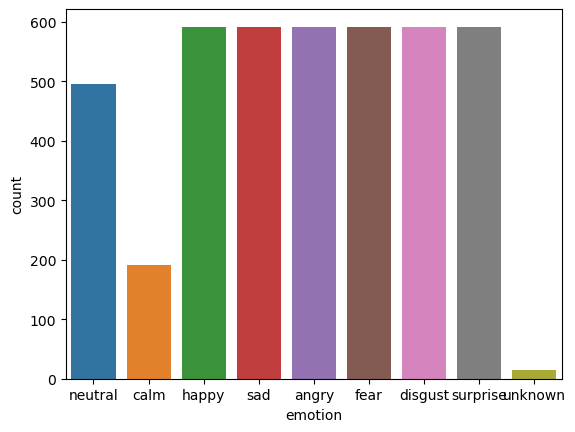

In [39]:
sns.countplot(x=df["emotion"]);

### Removing unnecessary values

In [40]:
ind = df[(df['emotion']=='unknown') | (df['emotion']=="calm")].index
df.drop(ind, inplace=True)
df.index = np.arange(len(df))
df

,gender,emotion,labels,path
0,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-01-01.wav
1,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-01-02-01.wav
2,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-01-01.wav
3,male,neutral,male_neutral,D:/project/data/Actor_01/03-01-01-01-02-02-01.wav
4,male,happy,male_happy,D:/project/data/Actor_01/03-01-03-01-01-01-01.wav
...,...,...,...,...
4043,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4044,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4045,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...
4046,female,sad,female_sad,D:/project/TESS Toronto emotional speech set d...


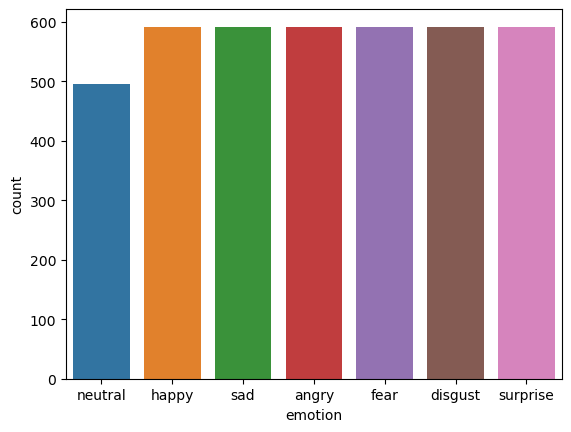

In [41]:
sns.countplot(x=df["emotion"]);

## Waveplots for Different emotion

### Waveplot for happy

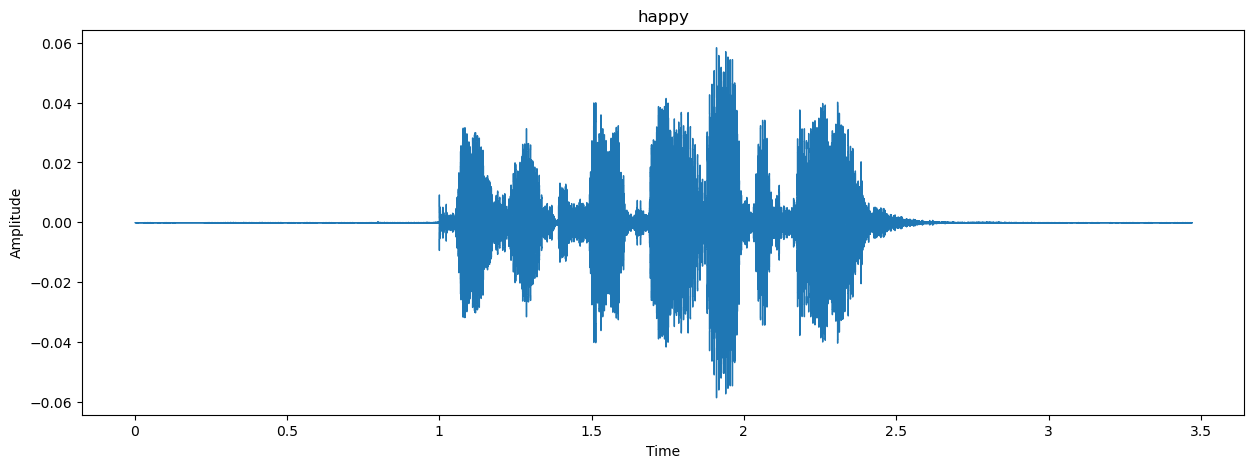

In [42]:
file=df[df["emotion"]=="happy"]
path=file["path"].iloc[0]
create_waveplot(path,"happy")

## waveplot for sad

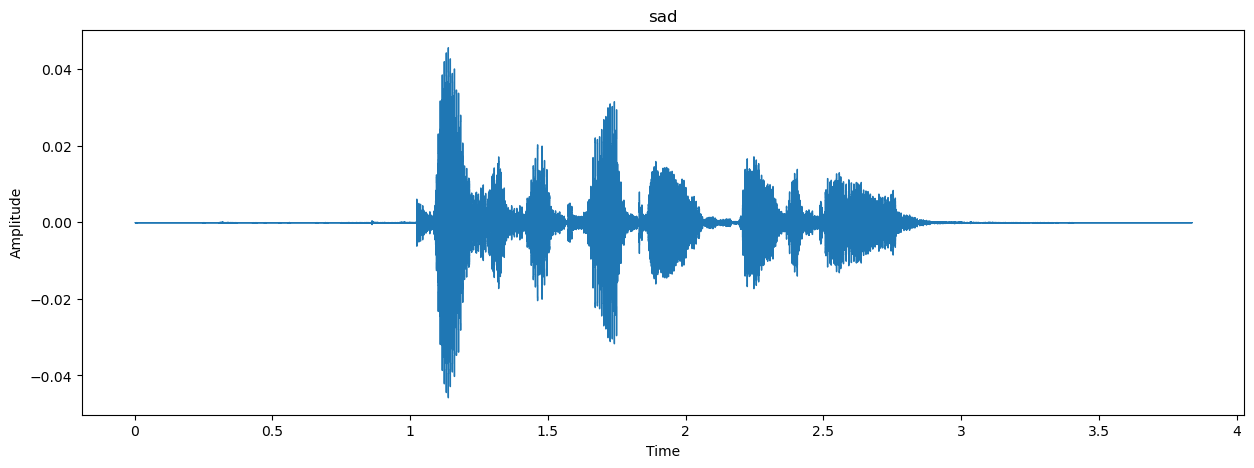

In [43]:
file=df[df["emotion"]=="sad"]
path=file["path"].iloc[0]
create_waveplot(path,"sad")

## waveplot for angry

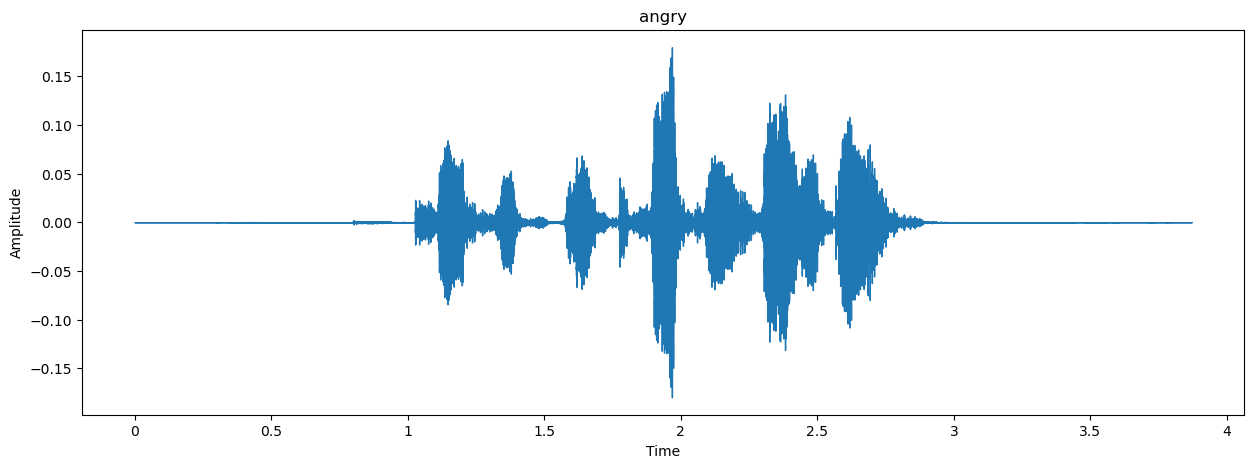

In [44]:
file=df[df["emotion"]=="angry"]
path=file["path"].iloc[0]
create_waveplot(path,"angry")

## waveplot for fear

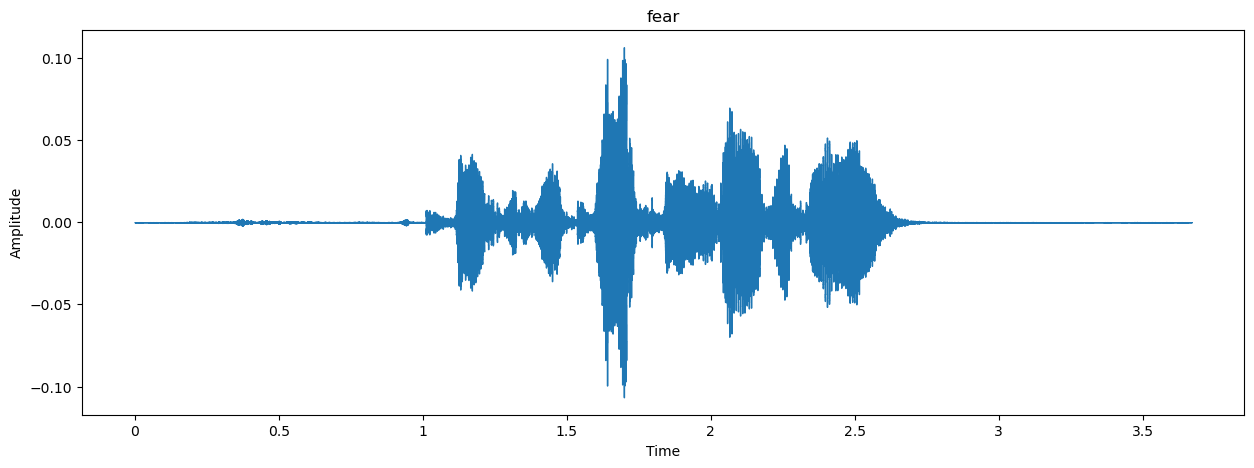

In [45]:
file=df[df["emotion"]=="fear"]
path=file["path"].iloc[0]
create_waveplot(path,"fear")

## waveplot for neutral

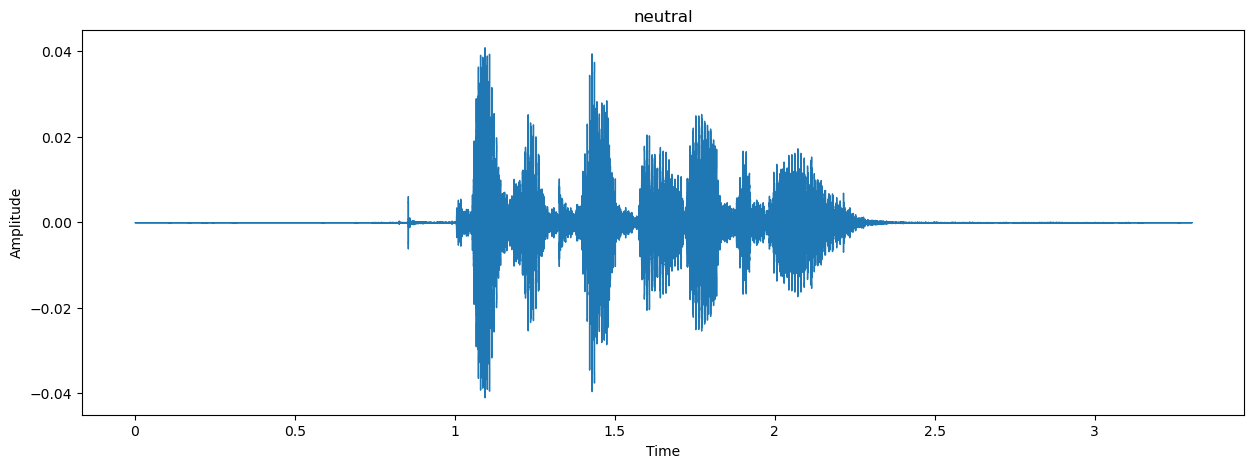

In [46]:
file=df[df["emotion"]=="neutral"]
path=file["path"].iloc[0]
create_waveplot(path,"neutral")

## waveplot for disgust

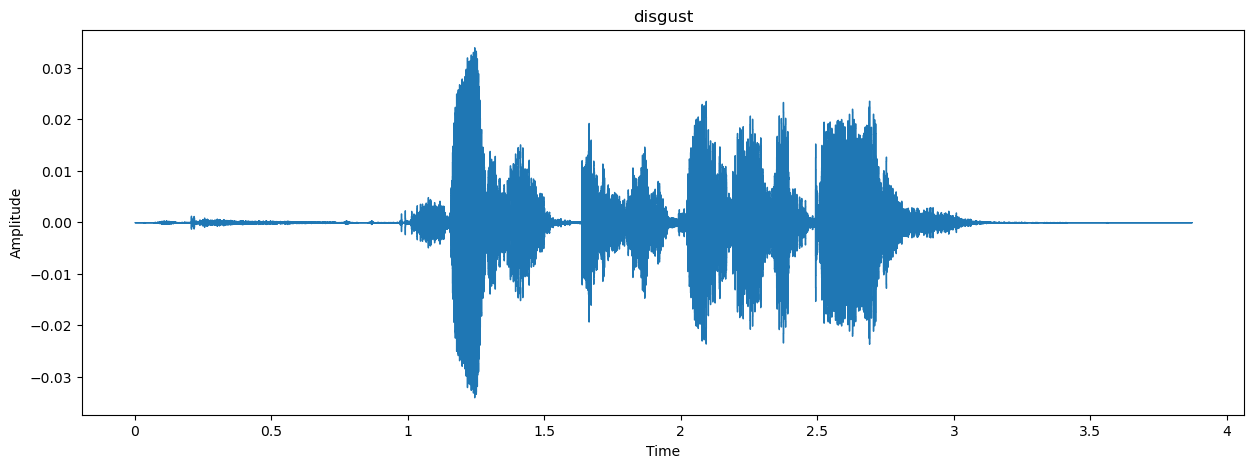

In [47]:
file=df[df["emotion"]=="disgust"]
path=file["path"].iloc[0]
create_waveplot(path,"disgust")

## waveplot for surprise

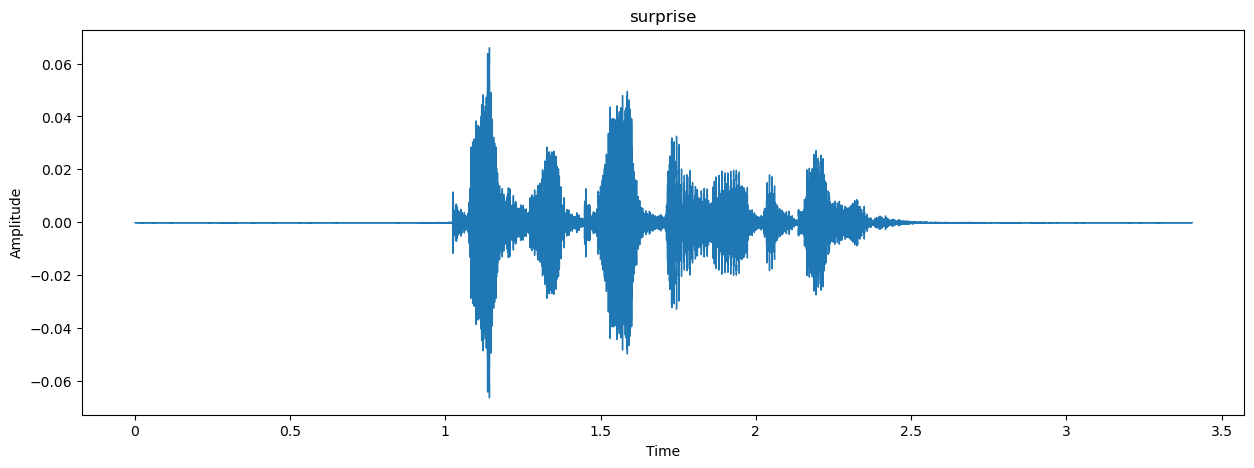

In [48]:
file=df[df["emotion"]=="surprise"]
path=file["path"].iloc[0]
create_waveplot(path,"surprise")

# Removing Silence

### Ravdess Dataset Sample

In [49]:
file =  df["path"][0]
file

'D:/project/data/Actor_01/03-01-01-01-01-01-01.wav'

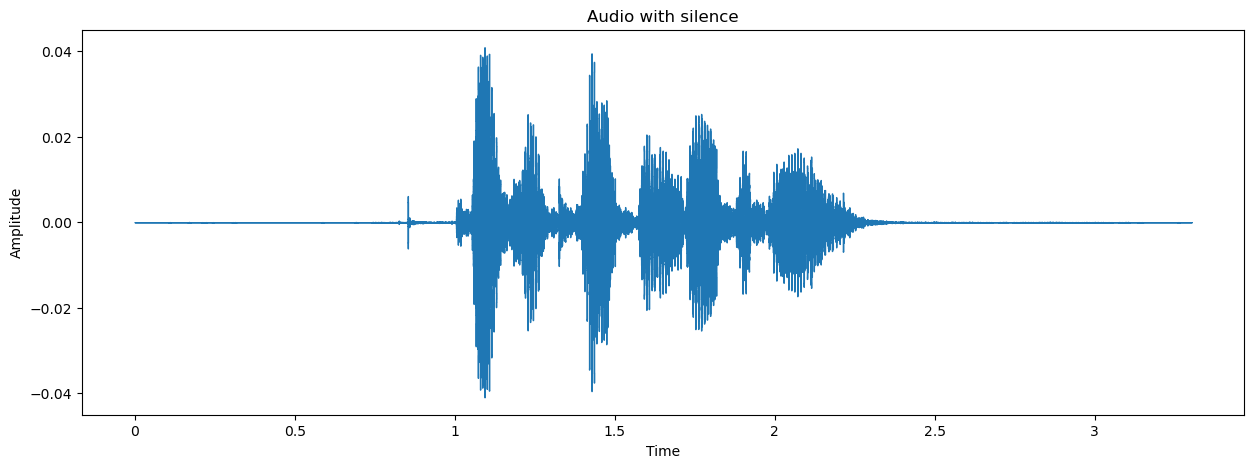

In [50]:
data,sr1 = librosa.load(file)
plt.figure(figsize=(15,5))
librosa.display.waveshow(data, sr=sr1);
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio with silence")
plt.show()

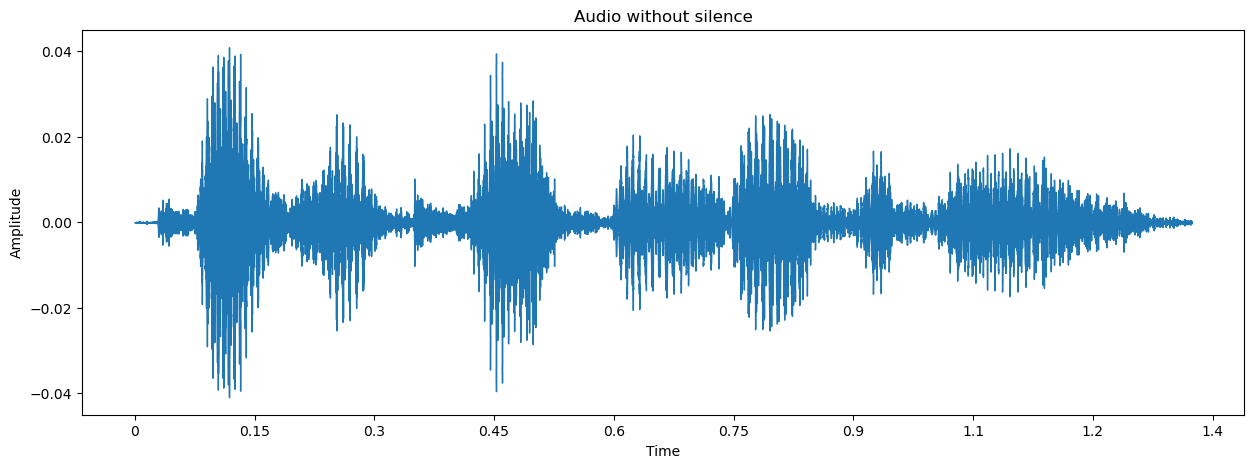

In [51]:
data1, _ = librosa.effects.trim(data, top_db = 30)
plt.figure(figsize=(15,5))
librosa.display.waveshow(data1);
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio without silence")
plt.show()

In [52]:
print(librosa.get_duration(data), librosa.get_duration(data1));

3.3033560090702947 1.3235374149659864


### Audio with Silence

In [53]:
ipd.Audio(data,rate=sr1)

### Audio without Silence

In [54]:
ipd.Audio(data1,rate=sr1)

### Tess Dataset Sample

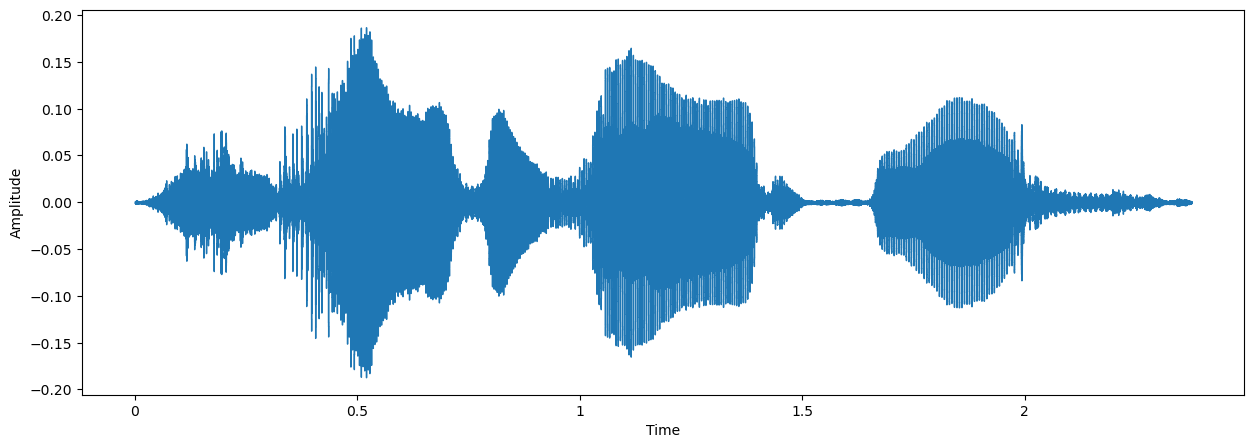

In [55]:
file2 =  df["path"][4047]
data2,sr2 = librosa.load(file2)
plt.figure(figsize=(15,5))
librosa.display.waveshow(data2, sr=sr2);
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

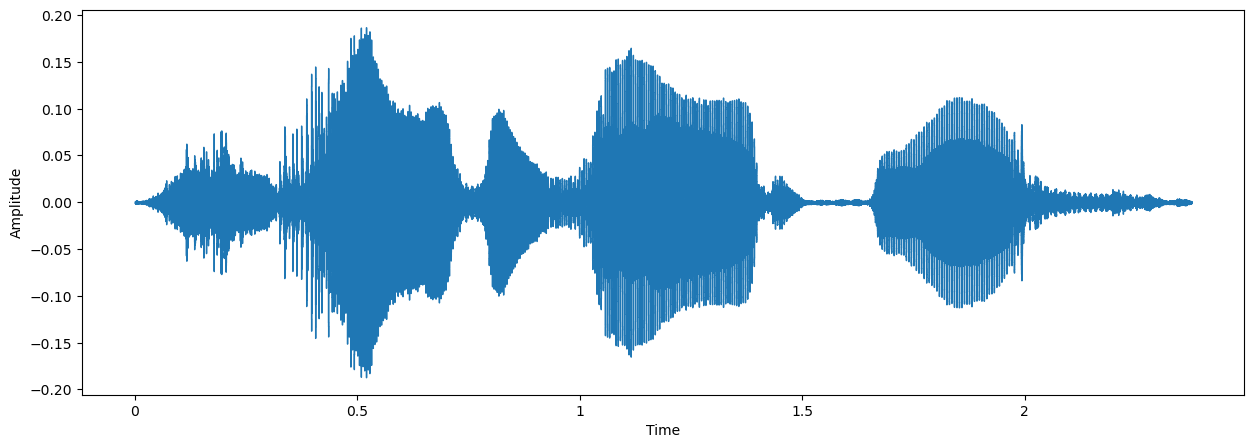

2.375374149659864 1.3235374149659864


In [56]:
data21, _ = librosa.effects.trim(data, top_db = 30);
plt.figure(figsize=(15,5));
librosa.display.waveshow(data2);
plt.xlabel("Time");
plt.ylabel("Amplitude");
plt.show();
print(librosa.get_duration(data2), librosa.get_duration(data21));

### Audio with Silence

In [57]:
ipd.Audio(data2,rate=sr2)

### Audio without Silence

In [58]:
ipd.Audio(data21,rate=sr2)

## Extracting Short term fourier transform

In [59]:
data,sr = librosa.load(df["path"][0])
data, _ = librosa.effects.trim(data, top_db = 30);

In [60]:
frame_size = 2048
hop_size =512

In [61]:
data_stft = librosa.stft(data,n_fft=frame_size,hop_length=hop_size)  

In [62]:
data_stft.shape     #freq bins, no. of frames

(1025, 58)

In [63]:
data_stft.dtype

dtype('complex64')

# Spectogram

### calculating the spectogram

In [64]:
y=np.abs(data_stft)**2

In [65]:
y.shape

(1025, 58)

In [66]:
y.dtype

dtype('float32')

## visualize the spectogram

In [67]:
def display_spectogram(data, sr, hl, ya):
    plt.figure(figsize=(15,5))
    librosa.display.specshow(data, sr=sr, hop_length = hl, x_axis="time", y_axis = ya)
    plt.title("Spectogram")
    plt.colorbar(format="%+2.f")
    plt.show()

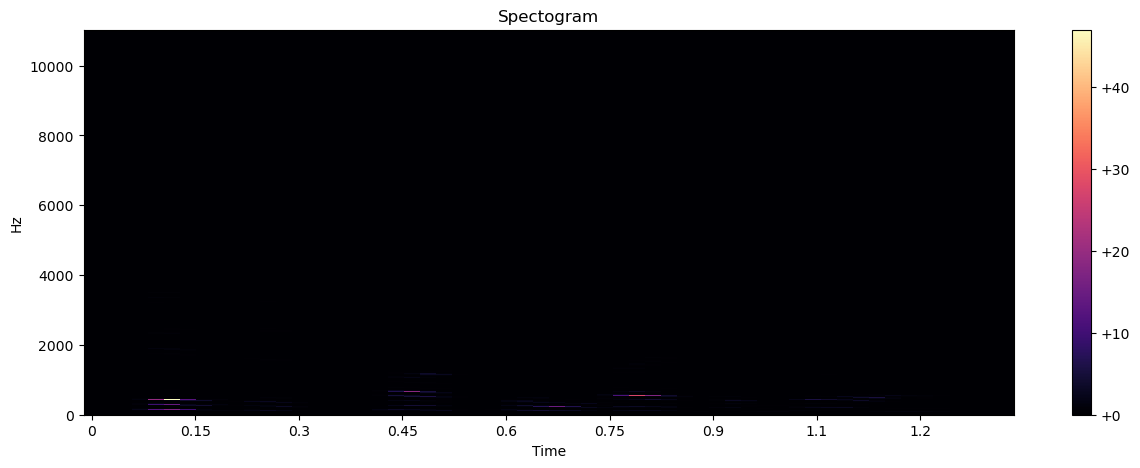

In [68]:
display_spectogram(y,sr,hop_size,"linear")

### Log Amplitude Spectogram

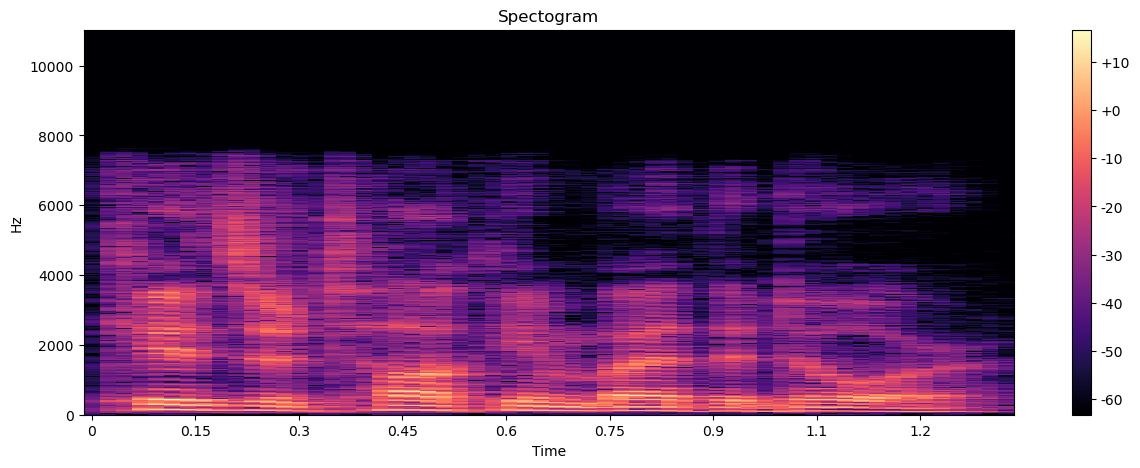

In [69]:
y1=librosa.power_to_db(y)
display_spectogram(y1,sr,hop_size,"linear")

### Log Frequency Spectogram

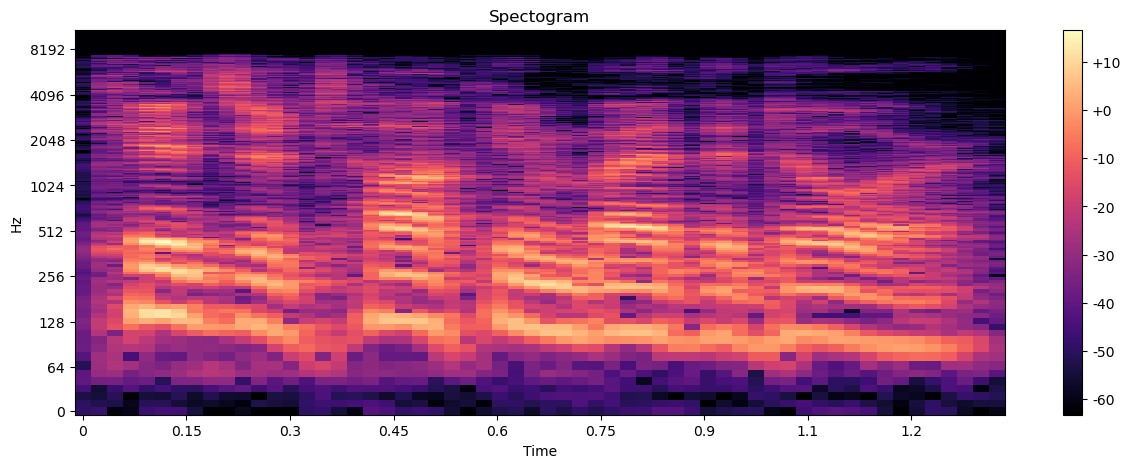

In [70]:
display_spectogram(y1,sr,hop_size,"log")


### Spectogram for the audio containing silence

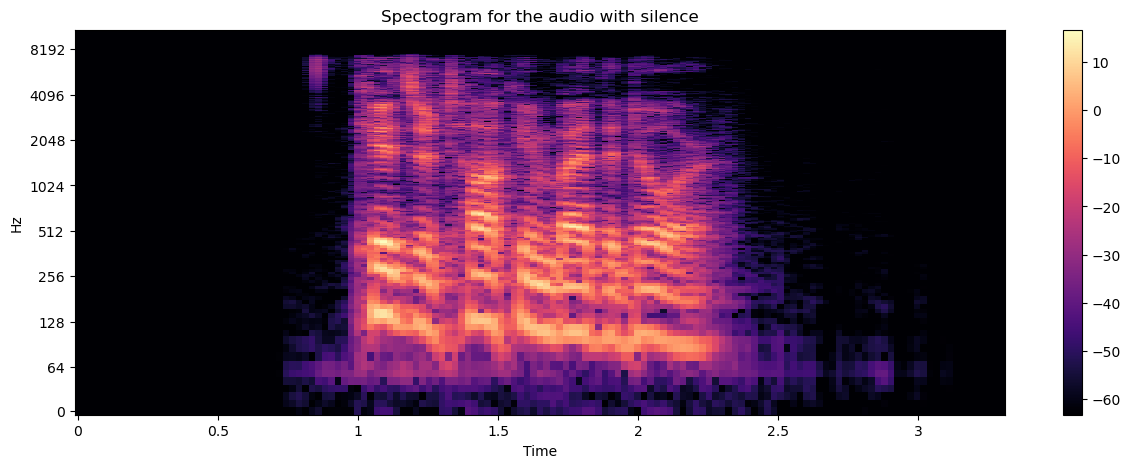

In [71]:
data,sr = librosa.load(df["path"][0])
D = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(D))
plt.figure(figsize=(15,5))
librosa.display.specshow(S_db, sr=sr, hop_length = hop_size, x_axis="time", y_axis = "log");
plt.title("Spectogram for the audio with silence")
plt.colorbar()
plt.show()

### Spectogram for the audio doesn't contain silence

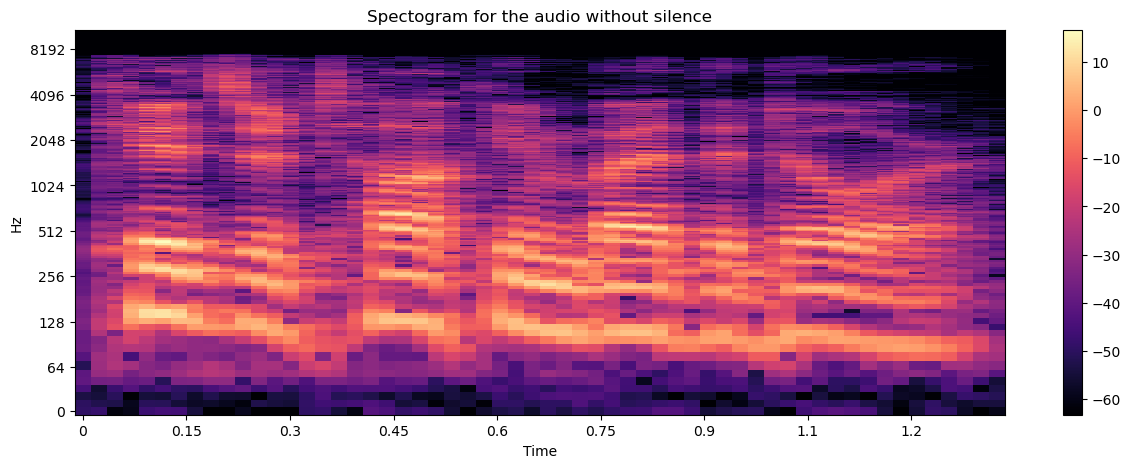

In [72]:
data,sr = librosa.load(df["path"][0])
data1, _ = librosa.effects.trim(data, top_db = 30);
D = librosa.stft(data1)  
S_db = librosa.amplitude_to_db(np.abs(D))
plt.figure(figsize=(15,5))
librosa.display.specshow(S_db,sr=sr, hop_length = hop_size, x_axis="time", y_axis = "log");
plt.title("Spectogram for the audio without silence")
plt.colorbar()
plt.show()

## MFCC 

### Extract MFCC

In [73]:
data,sr = librosa.load(df["path"][0])
data, _ = librosa.effects.trim(data, top_db = 30);

In [74]:
mfccs = librosa.feature.mfcc(data, n_mfcc=13, sr=sr)

In [75]:
mfccs.shape       # Number of coefficients, frames

(13, 58)

### Visualize MFCC 

In [76]:
def plot_mfcc(m):
    plt.figure(figsize=(15,5))
    librosa.display.specshow(m, x_axis="time")
    plt.ylabel('MFCC COEFFS')
    plt.title('MFCC');
    plt.colorbar()
    plt.show()

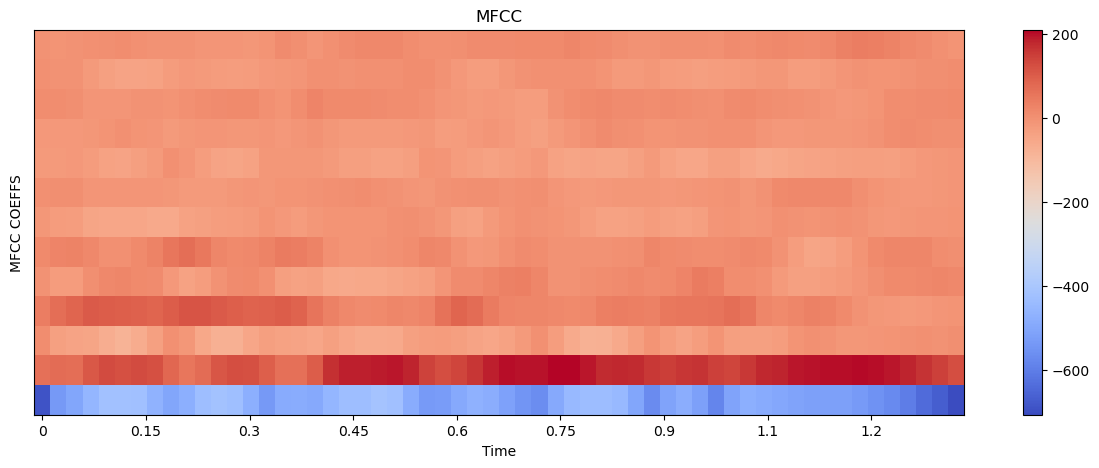

In [77]:
plot_mfcc(mfccs)

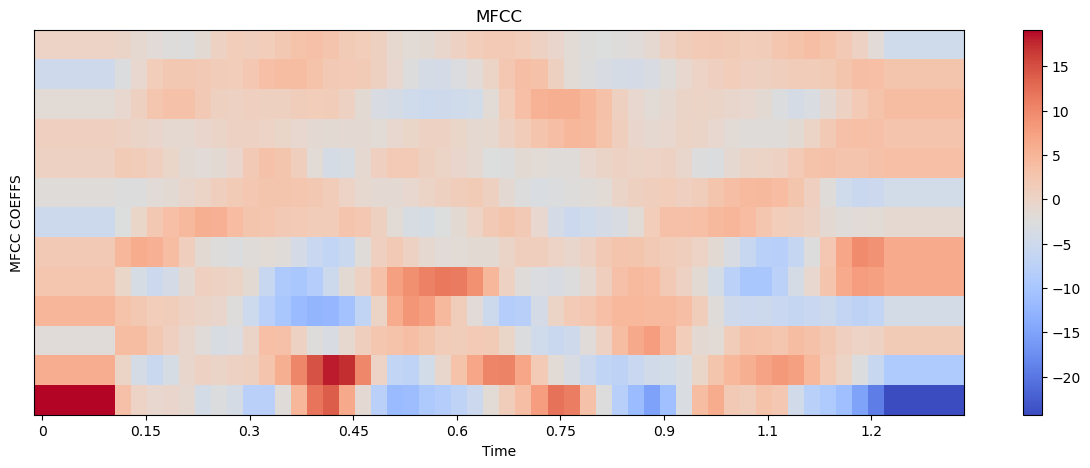

In [78]:
delta_mfccs = librosa.feature.delta(mfccs)
plot_mfcc(delta_mfccs)

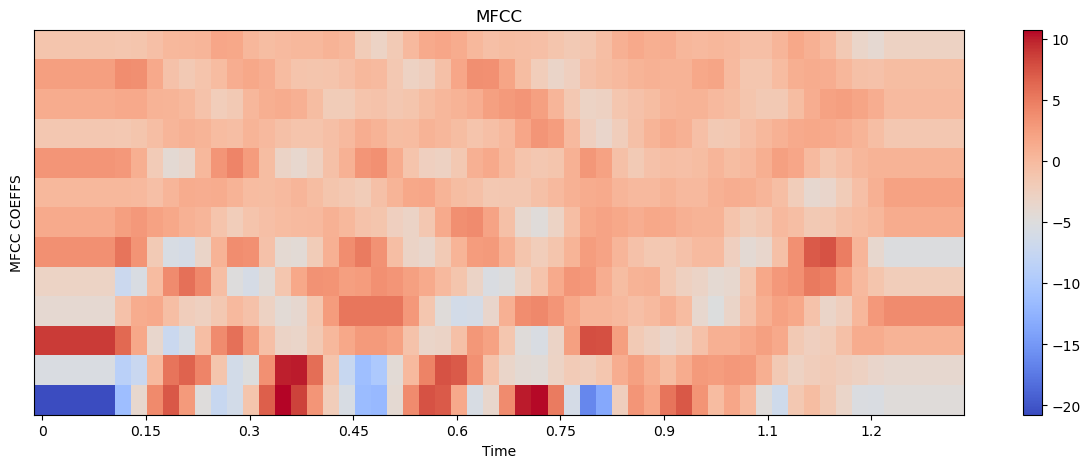

In [79]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
plot_mfcc(delta2_mfccs)

In [80]:
mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0)

In [81]:
print(mfccs.shape, delta_mfccs.shape, delta2_mfccs.shape)

(13, 58) (13, 58) (13, 58)


In [82]:
mfcc.shape

(39, 58)

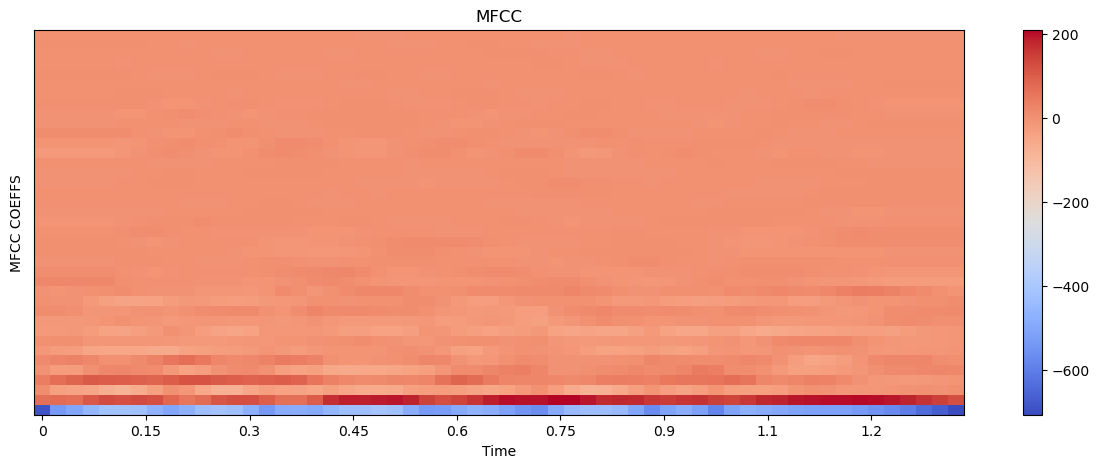

In [83]:
plot_mfcc(mfcc)

In [84]:
mfcc

array([[-6.9125702e+02, -5.3696069e+02, -5.0307715e+02, ...,
        -6.4046008e+02, -6.6751385e+02, -7.0659967e+02],
       [ 6.5726059e+01,  7.2329315e+01,  6.8662979e+01, ...,
         1.6676315e+02,  1.4782986e+02,  1.2568710e+02],
       [ 7.2819753e+00, -3.4421127e+01, -4.2001801e+01, ...,
         7.9688168e-01, -1.8942666e+00,  4.5672321e+00],
       ...,
       [ 1.3031198e+00,  1.3031198e+00,  1.3031198e+00, ...,
        -4.7864471e-02, -4.7864471e-02, -4.7864471e-02],
       [ 2.4899065e+00,  2.4899065e+00,  2.4899065e+00, ...,
        -2.2855283e-01, -2.2855283e-01, -2.2855283e-01],
       [-1.1057712e+00, -1.1057712e+00, -1.1057712e+00, ...,
        -2.8774428e+00, -2.8774428e+00, -2.8774428e+00]], dtype=float32)

In [85]:
data,sr = librosa.load(df["path"][0])
data, _ = librosa.effects.trim(data, top_db = 30);
m = np.mean(librosa.feature.mfcc(data, n_mfcc=39, sr=sr),axis=0)

In [86]:
m.shape

(58,)

In [87]:
mfcc.shape

(39, 58)

In [88]:
mfcc[0]

array([-691.257  , -536.9607 , -503.07715, -459.479  , -422.61075,
       -422.23398, -426.92966, -468.88733, -502.76685, -481.08554,
       -432.4483 , -416.93094, -429.0355 , -480.8168 , -534.7996 ,
       -489.20264, -486.31488, -494.9404 , -458.4904 , -431.45636,
       -431.26505, -414.44873, -425.34406, -485.0267 , -533.227  ,
       -530.4919 , -493.8313 , -470.95374, -481.953  , -516.47723,
       -548.8697 , -565.0612 , -494.02725, -447.29306, -437.93427,
       -435.68887, -445.9545 , -505.66592, -570.34753, -513.2303 ,
       -482.07007, -520.04175, -583.66254, -513.1653 , -480.57446,
       -488.99756, -499.68002, -511.28223, -518.92773, -519.346  ,
       -517.72205, -532.9602 , -554.9489 , -572.6144 , -599.7699 ,
       -640.4601 , -667.51385, -706.5997 ], dtype=float32)

In [89]:
# l=pd.DataFrame(pd.DataFrame(m).values.tolist())
# l.shape

In [90]:
# l

In [91]:
# m = extract_mfcc(5)
# n = extract(5)

In [92]:
# m.shape, n.shape

In [93]:
# m

In [94]:
# n

In [95]:
# v = pd.DataFrame(pd.DataFrame(m).values.tolist())

In [96]:
# v

In [97]:
def extract(i):
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30)
    mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0)  
    
    return mfcc
   

In [98]:
def extract_mfcc(i):
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30);
    mfcc = np.mean(librosa.feature.mfcc(data, n_mfcc=15, sr=sr),axis=0)
    
    return mfcc
   

In [99]:
fe = pd.DataFrame(columns=["feature","gender","emotion"])

In [100]:
for i in range(len(df)):
    y = extract(i)
    fe.loc[i]=[y,df["gender"][i],df["emotion"][i]]

In [101]:
fe

,feature,gender,emotion
0,"[-47.13665, -38.300213, -34.536903, -30.43614,...",male,neutral
1,"[-46.921383, -41.038414, -34.663094, -29.67118...",male,neutral
2,"[-52.359905, -33.59187, -27.020113, -26.888243...",male,neutral
3,"[-49.16603, -32.279392, -26.588297, -26.81086,...",male,neutral
4,"[-47.86747, -39.86683, -35.862236, -29.550455,...",male,happy
...,...,...,...
4043,"[-27.848812, -24.549477, -27.128193, -26.79439...",female,sad
4044,"[-29.943563, -27.842247, -27.562992, -26.51023...",female,sad
4045,"[-22.66866, -20.33187, -21.254448, -22.558653,...",female,sad
4046,"[-30.508251, -27.490164, -27.26188, -26.269382...",female,sad


In [102]:
fe.shape

(4048, 3)

In [103]:
# fe["feature"][0].shape

In [104]:
h=[]
for i in range(len(df)):
    h.append(fe["feature"][i].shape)
print(max(h))

(552,)


In [275]:
d = pd.DataFrame(fe["feature"].values.tolist())

In [276]:
d.isna().sum().sum()

3851886

In [277]:
d=d.fillna(0)

In [278]:
d

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
0,-47.136650,-38.300213,-34.536903,-30.436140,-29.739153,-31.774105,-29.807377,-30.586823,-31.381121,-31.141563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-46.921383,-41.038414,-34.663094,-29.671185,-29.635355,-30.130421,-30.064699,-33.163689,-33.646416,-34.692577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-52.359905,-33.591869,-27.020113,-26.888243,-27.077290,-27.604118,-28.255602,-27.169312,-28.330566,-29.598511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-49.166031,-32.279392,-26.588297,-26.810860,-27.346313,-27.405308,-26.920515,-26.178047,-27.506565,-27.421398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-47.867470,-39.866829,-35.862236,-29.550455,-27.143288,-29.613474,-30.134762,-32.758553,-32.323021,-35.503998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,-38.405254,-28.114918,-26.077267,-26.781666,-21.894186,-20.614824,-26.583736,-29.531471,-29.063242,-28.981297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9041,-26.636345,-24.083921,-21.668003,-19.029163,-17.828321,-20.381144,-23.861767,-21.859510,-21.372490,-23.514009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9042,-28.824228,-26.660643,-27.068052,-26.772142,-25.138695,-25.317898,-26.476162,-24.850534,-24.550703,-25.686605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043,-33.330910,-29.389912,-27.717451,-27.269306,-27.322334,-29.426390,-31.253792,-29.285789,-28.977037,-30.239746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
d.isna().sum().sum()

0

In [110]:
# se = fe.sample(frac=1)

In [143]:
def noise(data):
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype("float64")+noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    s_range = int(np.random.uniform(low=-5,high=5)*500)
    return np.roll(data,s_range)

def stretch(data,rate=0.8):
    data = librosa.effects.time_stretch(data,rate)
    return data

def pitch(data,sample_rate):
    bins_per_octave = 12
    pitch_pm=2
    pitch_change = pitch_pm*2(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype("float64"),sample_rate,n_steps=pitch_change,bins_per_octave=bins_per_octave)
    return data

def dyn_change(data):
    dyn_change = np.random.uniform(low=1.5,high = 3)
    return (data*dyn_change)

def speedNpitch(data):
    length_change=np.random.uniform(low=0.8,high=1)
    speed_fac = 1.0/length_change
    tmp=np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0],tmp.shape[0])
    data*=0
    data[0:minlen]=tmp[0:minlen]
    return data

In [149]:
l=[]
while len(l)!=1000:
    x = np.random.randint(0,4048)
    if x not in l:
        l.append(x)

In [151]:
len(l)

1000

In [152]:
j=0
for i in l:
    p = df["path"][i]
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30);
    data = noise(data)
    mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0) 
    fe.loc[len(fe)+j]=[mfcc,df["gender"][i],df["emotion"][i]]
    j+=1
    

In [154]:
j=0
for i in l:
    p = df["path"][i]
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30);
    data = shift(data)
    mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0) 
    fe.loc[len(fe)+j]=[mfcc,df["gender"][i],df["emotion"][i]]
    j+=1
    

In [258]:
j=0
for i in l:
    p = df["path"][i]
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30);
    data = stretch(data)
    mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0) 
    fe.loc[len(fe)+j]=[mfcc,df["gender"][i],df["emotion"][i]]
    j+=1

In [ ]:
# j=0
# for i in l:
#     p = df["path"][i]
#     data,sr = librosa.load(df["path"][i])
#     data, _ = librosa.effects.trim(data, top_db = 30);
#     data = pitch(data,sr)
#     mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
#     delta_mfccs = librosa.feature.delta(mfccs)
#     delta2_mfccs = librosa.feature.delta(mfccs, order=2)
#     mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0) 
#     fe.loc[len(fe)+j]=[mfcc,df["gender"][i],df["emotion"][i]]
#     j+=1

In [267]:
j=0
for i in l:
    p = df["path"][i]
    data,sr = librosa.load(df["path"][i])
    data, _ = librosa.effects.trim(data, top_db = 30);
    data = dyn_change(data)
    mfccs = np.mean(librosa.feature.mfcc(data, n_mfcc=13, sr=sr),axis=0)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs),axis=0) 
    fe.loc[len(fe)+j]=[mfcc,df["gender"][i],df["emotion"][i]]
    j+=1

In [268]:
fe.index = np.arange(len(fe))

In [269]:
fe

,feature,gender,emotion
0,"[-47.13665, -38.300213, -34.536903, -30.43614,...",male,neutral
1,"[-46.921383, -41.038414, -34.663094, -29.67118...",male,neutral
2,"[-52.359905, -33.59187, -27.020113, -26.888243...",male,neutral
3,"[-49.16603, -32.279392, -26.588297, -26.81086,...",male,neutral
4,"[-47.86747, -39.86683, -35.862236, -29.550455,...",male,happy
...,...,...,...
9040,"[-38.405254, -28.114918, -26.077267, -26.78166...",male,happy
9041,"[-26.636345, -24.083921, -21.668003, -19.02916...",female,angry
9042,"[-28.824228, -26.660643, -27.068052, -26.77214...",female,angry
9043,"[-33.33091, -29.389912, -27.717451, -27.269306...",female,disgust


## splittiing the Dataset

In [273]:
from sklearn.model_selection import train_test_split

In [280]:
x_train,x_test,y_train,y_test = train_test_split(d,fe["emotion"],test_size=0.25,random_state=122)

In [281]:
len(x_train),len(y_train),len(x_test),len(y_test)

(6783, 6783, 2262, 2262)

In [282]:
y_train.value_counts()

disgust     1097
angry        986
sad          982
happy        959
surprise     952
fear         940
neutral      867
Name: emotion, dtype: int64

In [283]:
y_test.value_counts()

happy       373
disgust     362
fear        323
neutral     317
surprise    312
angry       303
sad         272
Name: emotion, dtype: int64

In [284]:
x_train.isna().sum().sum()

0

In [285]:
x_test.isna().sum().sum()

0

In [286]:
x_train.shape

(6783, 687)

In [287]:
y_train.shape

(6783,)

In [288]:
x_test.shape 

(2262, 687)

In [289]:
y_test.shape

(2262,)

In [291]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
634,-30.352242,-23.237759,-21.787476,-22.478224,-23.770504,-26.497877,-27.908424,-30.090940,-31.030668,-33.442356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6957,-63.395237,-54.513924,-51.495754,-52.042870,-51.247684,-50.477413,-51.696064,-52.355446,-52.555832,-52.894218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1368,-25.879110,-26.451403,-29.302010,-26.615078,-25.520687,-26.765484,-26.099226,-25.826050,-26.953484,-28.700727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7028,-31.800472,-31.582584,-32.906433,-32.470634,-31.320019,-31.421480,-31.341270,-32.062737,-30.417309,-29.650856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,-31.751791,-27.010515,-31.084442,-35.779415,-37.174679,-38.647114,-39.949020,-41.191631,-39.636639,-41.913094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,-46.641037,-43.176437,-45.155109,-46.369576,-46.702759,-45.829285,-46.088970,-45.727440,-41.730259,-38.487152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,-37.554161,-31.012529,-29.460522,-30.993866,-30.028807,-26.192387,-24.777069,-25.843117,-27.934086,-27.061110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6974,-39.475624,-37.854313,-36.988632,-37.167324,-35.999580,-35.088100,-35.607723,-37.075680,-38.100651,-38.641792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2442,-35.832439,-35.852863,-36.875137,-34.816795,-34.212376,-34.977566,-32.807278,-32.686443,-34.681812,-34.800163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
4529,-32.988088,-27.726391,-23.555639,-21.449019,-27.368530,-31.510027,-33.197286,-32.061679,-28.157631,-25.898633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7256,-38.334187,-34.933384,-33.312618,-30.701822,-29.510048,-29.536736,-29.470226,-30.140900,-30.602112,-29.053453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,-31.831199,-27.896514,-26.412108,-27.036759,-26.849076,-27.188037,-28.429618,-27.180392,-26.569787,-23.915631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,-27.895369,-30.474771,-36.754154,-35.728756,-36.222187,-36.432144,-36.820076,-36.348717,-36.473309,-31.372721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,-33.270237,-25.926229,-25.140120,-27.675072,-31.192728,-31.529133,-31.948214,-30.857933,-25.514933,-20.265583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-35.896297,-26.572905,-25.664955,-28.974277,-32.166077,-32.467560,-28.670635,-28.102072,-30.500765,-32.922783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,-34.335559,-26.714932,-27.862129,-32.728618,-34.341430,-38.575514,-40.686576,-38.604838,-39.477975,-41.319324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,-37.565623,-35.063990,-35.745424,-35.449751,-33.831236,-31.437344,-32.601146,-34.261782,-32.429491,-32.475511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,-42.622055,-41.069965,-39.832962,-37.397755,-37.108006,-36.802704,-36.398304,-34.180058,-34.493519,-37.328545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### training data

In [293]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
634,-30.352242,-23.237759,-21.787476,-22.478224,-23.770504,-26.497877,-27.908424,-30.090940,-31.030668,-33.442356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6957,-63.395237,-54.513924,-51.495754,-52.042870,-51.247684,-50.477413,-51.696064,-52.355446,-52.555832,-52.894218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1368,-25.879110,-26.451403,-29.302010,-26.615078,-25.520687,-26.765484,-26.099226,-25.826050,-26.953484,-28.700727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7028,-31.800472,-31.582584,-32.906433,-32.470634,-31.320019,-31.421480,-31.341270,-32.062737,-30.417309,-29.650856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,-31.751791,-27.010515,-31.084442,-35.779415,-37.174679,-38.647114,-39.949020,-41.191631,-39.636639,-41.913094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,-46.641037,-43.176437,-45.155109,-46.369576,-46.702759,-45.829285,-46.088970,-45.727440,-41.730259,-38.487152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,-37.554161,-31.012529,-29.460522,-30.993866,-30.028807,-26.192387,-24.777069,-25.843117,-27.934086,-27.061110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6974,-39.475624,-37.854313,-36.988632,-37.167324,-35.999580,-35.088100,-35.607723,-37.075680,-38.100651,-38.641792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2442,-35.832439,-35.852863,-36.875137,-34.816795,-34.212376,-34.977566,-32.807278,-32.686443,-34.681812,-34.800163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
x_train.shape

(6783, 687)

In [295]:
x_train.isna().sum().sum()

0

In [296]:
# for i in range(len(xtrain)):
#     x = xtrain.loc[i].mean()
#     for j in range(len(xtrain.loc[0])):
#         if np.isnan(xtrain.loc[i][j]):
#             xtrain[j][i] = x

In [297]:
x_train.shape

(6783, 687)

In [298]:
x_train.isna().sum().sum()

0

### testing data

In [299]:
# x_test

In [300]:
# xtest= pd.DataFrame(x_test.values.tolist())

In [301]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
4529,-32.988088,-27.726391,-23.555639,-21.449019,-27.368530,-31.510027,-33.197286,-32.061679,-28.157631,-25.898633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7256,-38.334187,-34.933384,-33.312618,-30.701822,-29.510048,-29.536736,-29.470226,-30.140900,-30.602112,-29.053453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,-31.831199,-27.896514,-26.412108,-27.036759,-26.849076,-27.188037,-28.429618,-27.180392,-26.569787,-23.915631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,-27.895369,-30.474771,-36.754154,-35.728756,-36.222187,-36.432144,-36.820076,-36.348717,-36.473309,-31.372721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,-33.270237,-25.926229,-25.140120,-27.675072,-31.192728,-31.529133,-31.948214,-30.857933,-25.514933,-20.265583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-35.896297,-26.572905,-25.664955,-28.974277,-32.166077,-32.467560,-28.670635,-28.102072,-30.500765,-32.922783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,-34.335559,-26.714932,-27.862129,-32.728618,-34.341430,-38.575514,-40.686576,-38.604838,-39.477975,-41.319324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,-37.565623,-35.063990,-35.745424,-35.449751,-33.831236,-31.437344,-32.601146,-34.261782,-32.429491,-32.475511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,-42.622055,-41.069965,-39.832962,-37.397755,-37.108006,-36.802704,-36.398304,-34.180058,-34.493519,-37.328545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [302]:
x_test.shape

(2262, 687)

In [303]:
x_test.shape

(2262, 687)

In [304]:
x_test.isna().sum().sum()

0

In [305]:
x_test.shape

(2262, 687)

In [306]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
4529,-32.988088,-27.726391,-23.555639,-21.449019,-27.368530,-31.510027,-33.197286,-32.061679,-28.157631,-25.898633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7256,-38.334187,-34.933384,-33.312618,-30.701822,-29.510048,-29.536736,-29.470226,-30.140900,-30.602112,-29.053453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,-31.831199,-27.896514,-26.412108,-27.036759,-26.849076,-27.188037,-28.429618,-27.180392,-26.569787,-23.915631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,-27.895369,-30.474771,-36.754154,-35.728756,-36.222187,-36.432144,-36.820076,-36.348717,-36.473309,-31.372721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,-33.270237,-25.926229,-25.140120,-27.675072,-31.192728,-31.529133,-31.948214,-30.857933,-25.514933,-20.265583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-35.896297,-26.572905,-25.664955,-28.974277,-32.166077,-32.467560,-28.670635,-28.102072,-30.500765,-32.922783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,-34.335559,-26.714932,-27.862129,-32.728618,-34.341430,-38.575514,-40.686576,-38.604838,-39.477975,-41.319324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,-37.565623,-35.063990,-35.745424,-35.449751,-33.831236,-31.437344,-32.601146,-34.261782,-32.429491,-32.475511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,-42.622055,-41.069965,-39.832962,-37.397755,-37.108006,-36.802704,-36.398304,-34.180058,-34.493519,-37.328545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
# for i in range(len(xtest)):
#     x = xtest.loc[i].mean()
#     for j in range(len(xtest.loc[0])):
#         if np.isnan(xtest.loc[i][j]):
#             xtest[j][i] = x

In [308]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
4529,-32.988088,-27.726391,-23.555639,-21.449019,-27.368530,-31.510027,-33.197286,-32.061679,-28.157631,-25.898633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7256,-38.334187,-34.933384,-33.312618,-30.701822,-29.510048,-29.536736,-29.470226,-30.140900,-30.602112,-29.053453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,-31.831199,-27.896514,-26.412108,-27.036759,-26.849076,-27.188037,-28.429618,-27.180392,-26.569787,-23.915631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,-27.895369,-30.474771,-36.754154,-35.728756,-36.222187,-36.432144,-36.820076,-36.348717,-36.473309,-31.372721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,-33.270237,-25.926229,-25.140120,-27.675072,-31.192728,-31.529133,-31.948214,-30.857933,-25.514933,-20.265583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-35.896297,-26.572905,-25.664955,-28.974277,-32.166077,-32.467560,-28.670635,-28.102072,-30.500765,-32.922783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,-34.335559,-26.714932,-27.862129,-32.728618,-34.341430,-38.575514,-40.686576,-38.604838,-39.477975,-41.319324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,-37.565623,-35.063990,-35.745424,-35.449751,-33.831236,-31.437344,-32.601146,-34.261782,-32.429491,-32.475511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,-42.622055,-41.069965,-39.832962,-37.397755,-37.108006,-36.802704,-36.398304,-34.180058,-34.493519,-37.328545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
x_test.isna().sum().sum()

0

In [310]:
x_test.shape

(2262, 687)

## Labels

In [324]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils import to_categorical

In [325]:
lb = LabelEncoder()
ytrain = np_utils.to_categorical(lb.fit_transform(y_train))
ytest = np_utils.to_categorical(lb.fit_transform(y_test))

In [326]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [327]:
ytest

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [328]:
ytrain.shape, ytest.shape

((6783, 7), (2262, 7))

In [329]:
lb.classes_

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [330]:
lb.transform(['happy','angry','sad','fear','surprise','disgust','neutral'])

array([3, 0, 5, 2, 6, 1, 4])

In [331]:
lb.inverse_transform([3, 0, 5, 2, 6, 1, 4])

array(['happy', 'angry', 'sad', 'fear', 'surprise', 'disgust', 'neutral'],
      dtype=object)

In [332]:
y_train.index

Int64Index([ 634, 6957, 1368, 7028,  902, 5132, 6233, 7510, 7230, 4532,
            ...
            8499, 6884,  419, 1045, 3498,  694, 1342, 6974, 2442, 7663],
           dtype='int64', length=6783)

In [333]:
x_train.index

Int64Index([ 634, 6957, 1368, 7028,  902, 5132, 6233, 7510, 7230, 4532,
            ...
            8499, 6884,  419, 1045, 3498,  694, 1342, 6974, 2442, 7663],
           dtype='int64', length=6783)

In [334]:
x_test.index

Int64Index([4529, 7256, 4937, 5507, 3484, 4677, 6625, 3629, 7855,  684,
            ...
            1041, 8471, 4526, 7647, 5032, 2939, 4705, 4262, 2536, 2025],
           dtype='int64', length=2262)

## Expanding Dimensions

In [210]:
# xtestcnn = np.expand_dims(xtest,axis=2)

In [211]:
# xtraincnn.shape, xtestcnn.shape

In [212]:
# xt = xtrain[np.arange(184)]

In [213]:
# xt

In [214]:
# xtt = xt.iloc[:,:].values.reshape(len(xt),23,8,1)

In [215]:
# xtt.shape

In [216]:
# len(xt)

In [217]:
# xtrain

In [218]:
# xtest

In [219]:
# xtrain[np.arange(xtrain.shape[1],xtest.shape[1])]=np.nan

In [220]:
# xtrain

In [221]:
# xtrain = xtrain.fillna(0)

In [323]:
# xtrain

array([[[[-26.82509422],
         [-22.94569969],
         [-22.48227692],
         ...,
         [-23.40704346],
         [-18.90500069],
         [-17.11581802]],

        [[-15.98275948],
         [-17.42456245],
         [-20.68098259],
         ...,
         [-12.86548042],
         [-16.62067986],
         [-18.60164642]],

        [[-19.99651909],
         [-20.53118706],
         [-19.55423737],
         ...,
         [-23.73356056],
         [-23.26883125],
         [-23.37100029]],

        ...,

        [[  0.        ],
         [  0.        ],
         [  0.        ],
         ...,
         [  0.        ],
         [  0.        ],
         [  0.        ]],

        [[  0.        ],
         [  0.        ],
         [  0.        ],
         ...,
         [  0.        ],
         [  0.        ],
         [  0.        ]],

        [[  0.        ],
         [  0.        ],
         [  0.        ],
         ...,
         [  0.        ],
         [  0.        ],
         [  0.   

In [338]:
xtrain = x_train.iloc[:,:].values.reshape(len(x_train),229,3,1)

In [337]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
4529,-32.988088,-27.726391,-23.555639,-21.449019,-27.368530,-31.510027,-33.197286,-32.061679,-28.157631,-25.898633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7256,-38.334187,-34.933384,-33.312618,-30.701822,-29.510048,-29.536736,-29.470226,-30.140900,-30.602112,-29.053453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4937,-31.831199,-27.896514,-26.412108,-27.036759,-26.849076,-27.188037,-28.429618,-27.180392,-26.569787,-23.915631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,-27.895369,-30.474771,-36.754154,-35.728756,-36.222187,-36.432144,-36.820076,-36.348717,-36.473309,-31.372721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,-33.270237,-25.926229,-25.140120,-27.675072,-31.192728,-31.529133,-31.948214,-30.857933,-25.514933,-20.265583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-35.896297,-26.572905,-25.664955,-28.974277,-32.166077,-32.467560,-28.670635,-28.102072,-30.500765,-32.922783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,-34.335559,-26.714932,-27.862129,-32.728618,-34.341430,-38.575514,-40.686576,-38.604838,-39.477975,-41.319324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,-37.565623,-35.063990,-35.745424,-35.449751,-33.831236,-31.437344,-32.601146,-34.261782,-32.429491,-32.475511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,-42.622055,-41.069965,-39.832962,-37.397755,-37.108006,-36.802704,-36.398304,-34.180058,-34.493519,-37.328545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [335]:
# xtrain = x_train.iloc[:,:].values.reshape(len(x_train),24,23,1)

ValueError: cannot reshape array of size 4659921 into shape (6783,24,23,1)

In [339]:
xtrain.shape

(6783, 229, 3, 1)

In [340]:
xtrain[1].shape

(229, 3, 1)

In [227]:
# xtt[1].shape

In [228]:
# xtest.shape

In [229]:
# xte = xtest[np.arange(169)]

In [230]:
# xte

In [341]:
xtest = x_test.iloc[:,:].values.reshape(len(x_test),229,3,1)

In [342]:
xtest.shape

(2262, 229, 3, 1)

In [233]:
# xtet.shape

In [343]:
xtest[1].shape

(229, 3, 1)

## CNN Model

In [344]:
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [248]:
# model = Sequential()

# model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", input_shape = xtrain[1].shape)) #xtt[1].shape 
# model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2),padding = "same",strides=2))

# # model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# # model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# # model.add(MaxPooling2D(pool_size=(2,2), padding = "same",strides=2))

# # model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# # model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# # model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

# model.add(Flatten())
# model.add(Dropout(0.6))
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.6))
# model.add(Dense(7, activation = "softmax"))

In [249]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 23, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 23, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dropout_4 (Dropout)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
# opt = keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)  #0.00005 , 33.95  , 24

In [ ]:
# opt = keras.optimizers.SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False) #14 , 20

In [250]:
opt = keras.optimizers.Adam(learning_rate=0.0006, decay=0.0)  ## 44 , 0.0006, 53

In [251]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [252]:
# hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=20)

Epoch 1/100
227/227 [==============================] - 13s 56ms/step - loss: 1.9070 - accuracy: 0.2699 - val_loss: 1.6264 - val_accuracy: 0.3882
Epoch 2/100
227/227 [==============================] - 12s 53ms/step - loss: 1.6806 - accuracy: 0.3391 - val_loss: 1.5238 - val_accuracy: 0.4557
Epoch 3/100
227/227 [==============================] - 12s 54ms/step - loss: 1.5484 - accuracy: 0.4088 - val_loss: 1.4001 - val_accuracy: 0.4907
Epoch 4/100
227/227 [==============================] - 14s 60ms/step - loss: 1.4655 - accuracy: 0.4626 - val_loss: 1.3584 - val_accuracy: 0.4775
Epoch 5/100
227/227 [==============================] - 13s 58ms/step - loss: 1.3763 - accuracy: 0.4981 - val_loss: 1.2350 - val_accuracy: 0.5827
Epoch 6/100
227/227 [==============================] - 12s 52ms/step - loss: 1.3069 - accuracy: 0.5332 - val_loss: 1.1877 - val_accuracy: 0.5853
Epoch 7/100
227/227 [==============================] - 13s 59ms/step - loss: 1.2444 - accuracy: 0.5449 - val_loss: 1.1981 - val_ac

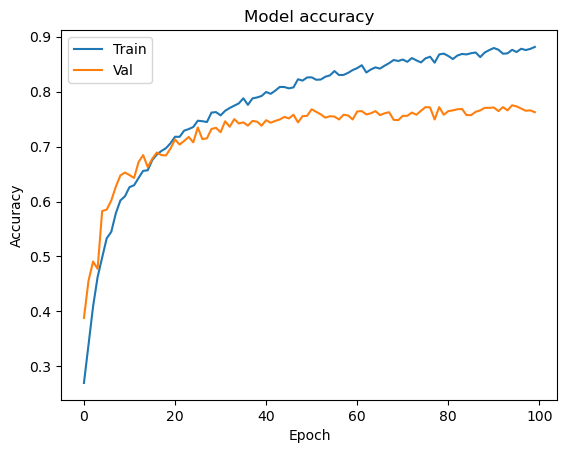

In [256]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

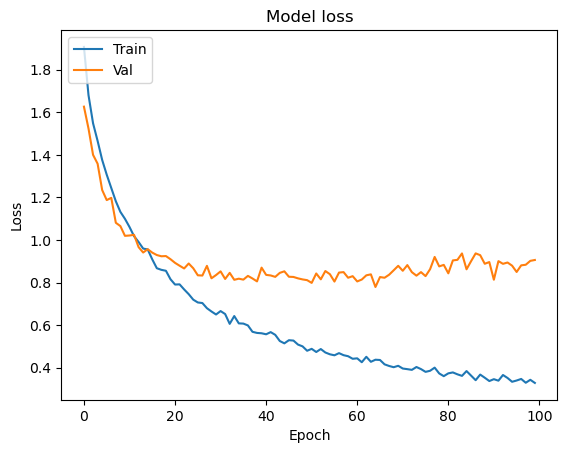

In [257]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [253]:
model.save("my_model.h5")

In [254]:
new_model = keras.models.load_model("my_model.h5")

In [255]:
new_model.evaluate(xtest,ytest)

48/48 [==============================] - 1s 14ms/step - loss: 0.9063 - accuracy: 0.7626


[0.9063229560852051, 0.7625661492347717]

In [345]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", input_shape = xtrain[1].shape)) #xtt[1].shape 
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding = "same",strides=2))

# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2), padding = "same",strides=2))

# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(7, activation = "softmax"))

In [346]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 229, 3, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 229, 3, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 115, 2, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 14720)             0         
                                                                 
 dropout_6 (Dropout)         (None, 14720)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1884288   
                                                      

In [348]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [349]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=20)

Epoch 1/100
340/340 [==============================] - 32s 92ms/step - loss: 1.7842 - accuracy: 0.3207 - val_loss: 1.6007 - val_accuracy: 0.4195
Epoch 2/100
340/340 [==============================] - 30s 87ms/step - loss: 1.6246 - accuracy: 0.4057 - val_loss: 1.4810 - val_accuracy: 0.4965
Epoch 3/100
340/340 [==============================] - 30s 88ms/step - loss: 1.5160 - accuracy: 0.4449 - val_loss: 1.3625 - val_accuracy: 0.5301
Epoch 4/100
340/340 [==============================] - 30s 88ms/step - loss: 1.4417 - accuracy: 0.4788 - val_loss: 1.2947 - val_accuracy: 0.5561
Epoch 5/100
340/340 [==============================] - 30s 88ms/step - loss: 1.3730 - accuracy: 0.4990 - val_loss: 1.2098 - val_accuracy: 0.5853
Epoch 6/100
340/340 [==============================] - 30s 89ms/step - loss: 1.3133 - accuracy: 0.5272 - val_loss: 1.1625 - val_accuracy: 0.6061
Epoch 7/100
340/340 [==============================] - 31s 91ms/step - loss: 1.2565 - accuracy: 0.5481 - val_loss: 1.1086 - val_ac

In [350]:
model.evaluate(xtest,ytest)

71/71 [==============================] - 2s 28ms/step - loss: 0.6828 - accuracy: 0.7821


[0.6828328371047974, 0.7820512652397156]

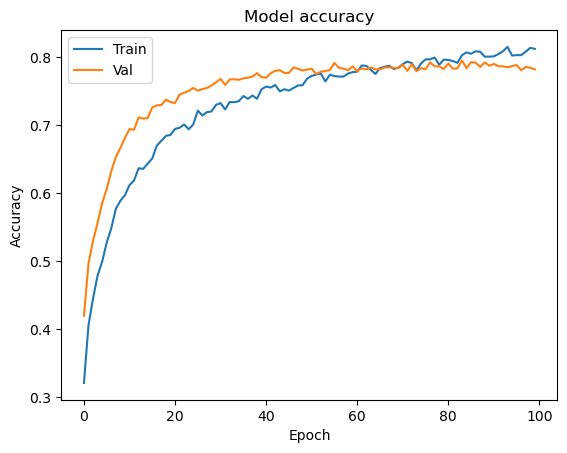

In [351]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

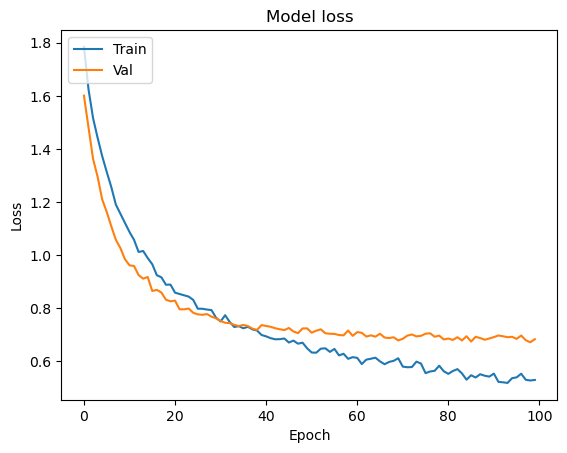

In [352]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [353]:
model.save("my_model1.h5")

In [ ]:
# new_model = keras.models.load_model("my_model1.h5")

In [ ]:
y_pred = model.predict(xte)
# y_pred = (y_pred>0.5)

In [ ]:
ytest.shape, y_pred.shape

In [ ]:
ytest,y_pred

In [ ]:
xte[0].shape

In [ ]:
ytest.shape

In [ ]:
# yt = ytest.reshape(ytest.shape[0],7,2,2)

In [ ]:
yp = model.predict(xte[0:5])

In [ ]:
yp.shape

In [ ]:
yp[yp>0.5]=1

In [ ]:
yp, ytest[0:5]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(ytest[0:5],yp)
sns.heatmap(cm,annot=True)

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", input_shape = xt[1].shape)) #xtt[1].shape 
model1.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size=(2,2),padding = "same",strides=2))

model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size=(2,2), padding = "same",strides=2))

# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = 3, padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model1.add(Flatten())
model1.add(Dropout(0.7))
model1.add(Dense(64, activation = "relu"))
model1.add(Dropout(0.7))
model1.add(Dense(7, activation = "softmax"))

In [ ]:
model1.summary()

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist = model1.fit(xt,ytrain,validation_data=(xte,ytest),epochs=200,batch_size=20)

In [ ]:
model1.evaluate(xte,ytest)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu", input_shape = xt[1].shape)) #xtt[1].shape 
model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D(pool_size=(2,2),padding = "same",strides=2))

model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Dropout(0.5))

model1.add(Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model1.add(Flatten())
model1.add(Dense(128, activation = "relu"))
model1.add(Dense(7, activation = "softmax"))


In [ ]:
model1.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0006, decay=1e-6)  ## 44 , 0.0006, 53

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(xt,ytrain,validation_data=(xte,ytest),epochs=100)

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# tf.config.run_functions_eagerly(True)

In [ ]:
# model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
weight = model.layers[0].get_weights()
print(len(weight))

In [ ]:
weight

In [ ]:
np.ndim(weight[0]), np.ndim(weight[1])

In [ ]:
for _ in range(20):
    model.fit(xtt,ytrain,validation_data=(xtet,ytest))

In [ ]:
loss,acc = model.evaluate(xtet,ytest)  # 73 0.69
print(acc)

In [ ]:
xtt.shape

In [ ]:
xtet.shape

In [ ]:
xtraincnn[1].shape

In [ ]:
xtraincnn.shape

In [ ]:
# his = model.fit(xtraincnn,ytrain,batch_size=16,epoch=20,validation_data=(xtestcnn,ytest))

In [ ]:
# pr=model.predict_classes(xtestcnn)
# pr[1]

In [ ]:
# lb.inverse_transform([pr[1]])

In [ ]:
# loss,acc = model.evaluate(xtestcnn,ytest)

In [ ]:
import speech_recognition as sr 

In [ ]:
# file = df["path"][4047]

In [ ]:
file = "C:/Users/HAFSA KURSHEED/Downloads/WhatsApp Audio 2023-01-30 at 14.37.24.wav"

In [ ]:
file = "C:/Users/HAFSA KURSHEED/Downloads/Moin.wav"

In [ ]:
ipd.Audio(file)

In [ ]:
r = sr.Recognizer()

In [ ]:
with sr.AudioFile(file) as source:
    a = r.record(source)
    t = r.recognize_google(a)
print(t)

In [ ]:
t